In [1]:
# data analysis
import pandas as pd
import numpy as np
import re

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[16,12])

# data processing 
from sklearn.preprocessing import LabelEncoder

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.dtypes)
print('-'*20)
print(df_test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
--------------------
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Data Preprocessing

## Pearson Correlation with Label Survived

In [4]:
corr = df_train.corr()
corr.sort_values(["Survived"], ascending = True, inplace = True)
print(corr.Survived)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64


## Drop PassengerID Feature 

In [5]:
'''
PassengerID is the order for each passenger in the list, which will not influence the final result
Thus, in the project, I will drop the PassengerID 
'''
df_train = df_train.drop('PassengerId', axis=1)

## Label Encode Age Feature

In [6]:
print(df_train.groupby('Sex').size())
print(df_test.groupby('Sex').size())

Sex
female    314
male      577
dtype: int64
Sex
female    152
male      266
dtype: int64


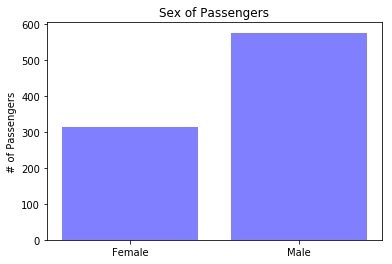

In [7]:
objects = ['Female', 'Male']
y_pos = np.arange(len(objects))
performance = [df_train['Sex'][df_train['Sex']=='female'].count(), df_train['Sex'][df_train['Sex']=='male'].count()]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('# of Passengers')
plt.title('Sex of Passengers')
 
plt.show()

In [8]:
df_train['Sex'] = LabelEncoder().fit_transform(df_train['Sex'])
df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])

In [9]:
print(df_train.groupby('Sex').size())
print(df_test.groupby('Sex').size())

Sex
0    314
1    577
dtype: int64
Sex
0    152
1    266
dtype: int64


## Missing Value

In [10]:
print(df_train.isnull().sum())
print('-'*20)
print(df_test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Imputate Missing Value at Embarked Feature

In [11]:
print(df_train.groupby('Embarked').size())

Embarked
C    168
Q     77
S    644
dtype: int64


In [12]:
print(df_train[df_train['Embarked'].isnull()])

     Survived  Pclass                                       Name  Sex   Age  \
61          1       1                        Icard, Miss. Amelie    0  38.0   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)    0  62.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
61       0      0  113572  80.0   B28      NaN  
829      0      0  113572  80.0   B28      NaN  


In [13]:
'''
From the information, only the age is different between the two passengers contained missing value in embarked feature
Find the most similar value with missing value and using mode to impute the value
'''
embark = df_train['Embarked'][(df_train['Pclass']==1)&\
                              (df_train['Sex']==0)&\
                              (df_train['SibSp']==0)&\
                              (df_train['Parch']==0)].mode()

In [14]:
df_train['Embarked'] = df_train['Embarked'].fillna(embark[0])

In [15]:
print(df_train.groupby('Embarked').size())

Embarked
C    170
Q     77
S    644
dtype: int64


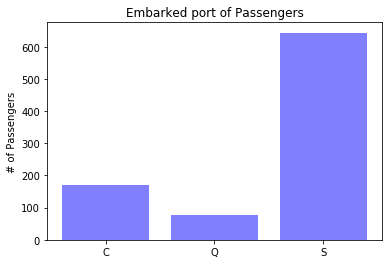

In [16]:
objects = ['C', 'Q', 'S']
y_pos = np.arange(len(objects))
performance = (list(df_train.groupby('Embarked').size()))

plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('# of Passengers')
plt.title('Embarked port of Passengers')
 
plt.show()

### Imputate Missing Value at Fare Feature 

In [17]:
fae = df_train['Fare']

In [18]:
print(df_test[df_test['Fare'].isnull()])

     PassengerId  Pclass                Name  Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas    1  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [19]:
'''
Using trainset value to imputate testset missing value
Using mean value to imputate the missing value
'''
fare = df_train['Fare'][(df_train['Pclass']==3)&\
                        (df_train['Sex']==1)&\
                        (df_train['SibSp']==0)&\
                        (df_train['Parch']==0)&\
                        (df_train['Embarked']=='S')].mean()

In [20]:
df_test['Fare'] = df_test['Fare'].fillna(round(fare))

In [21]:
print(df_train['Fare'].describe())
print('-'*30)
print(df_test['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
------------------------------
count    418.000000
mean      35.565879
std       55.854567
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64


In [22]:
print(df_train['Fare'].mode())
fare_mode = df_train['Fare'].mode()[0]

0    8.05
dtype: float64


In [23]:
'''
The fare should not be 0
modify value 0 in fare feature to trainset fare fearture mode
'''
df_train['Fare'] = df_train['Fare'].replace(0, fare_mode)
df_test['Fare'] = df_test['Fare'].replace(0, fare_mode)

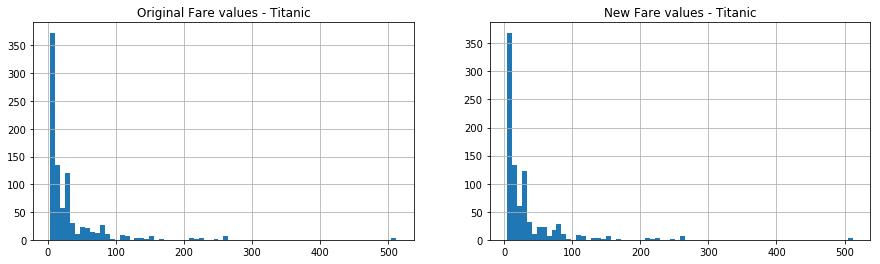

In [24]:
# Fare 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Fare values - Titanic')
axis2.set_title('New Fare values - Titanic')

fae.dropna().astype(int).hist(bins=70, ax=axis1)
df_train['Fare'].hist(bins=70, ax=axis2)

### Impuate Missing Value at Age Feature 

In [25]:
age = df_train['Age']

In [26]:
corr = df_train.corr()
corr.sort_values(["Age"], ascending = True, inplace = True)
print(corr.Age)

Pclass     -0.369226
SibSp      -0.308247
Parch      -0.189119
Survived   -0.077221
Sex         0.093254
Fare        0.096710
Age         1.000000
Name: Age, dtype: float64


In [27]:
print(df_train['Fare'].describe())

count    891.000000
mean      32.339730
std       49.616248
min        4.012500
25%        7.925000
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


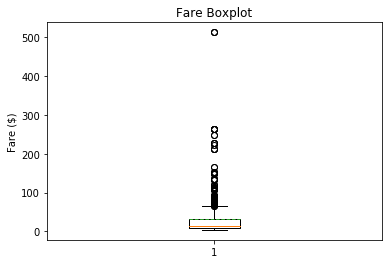

In [28]:
plt.boxplot(x=df_train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')
plt.show()

In [1]:
#print(df_train[df_train['Age'].isnull()])
#print(df_test[df_test['Age'].isnull()])

In [30]:
'''
Using fare feature to imputate missing value at age feature
Groupby the fare feature 
into four part:
fare: 0-8
fare: 8-15
fare: 15-31
fare: >31
Find the average age for each group 
Use the mean age to imputate the age feature
Imputate testset by trainset value
'''

age_g1 = df_train['Age'][df_train['Fare']<=8].mean()
age_g2 = df_train['Age'][(df_train['Fare']>8) & (df_train['Fare']<=15)].mean()
age_g3 = df_train['Age'][(df_train['Fare']>15) & (df_train['Fare']<=31)].mean()
age_g4 = df_train['Age'][df_train['Fare']>31].mean()

In [31]:
# trainset
df_train['Age'][df_train['Fare']<=8] = df_train['Age'][df_train['Fare']<=8].fillna(round(age_g1))
df_train['Age'][(df_train['Fare']>8)&\
                (df_train['Fare']<=15)] = df_train['Age'][(df_train['Fare']>8)&\
                                                          (df_train['Fare']<=15)].fillna(round(age_g2))
df_train['Age'][(df_train['Fare']>15)&\
                (df_train['Fare']<=31)] = df_train['Age'][(df_train['Fare']>15)&\
                                                          (df_train['Fare']<=31)].fillna(round(age_g3))
df_train['Age'][df_train['Fare']>31] = df_train['Age'][df_train['Fare']>31].fillna(round(age_g4))

In [32]:
# testset
df_test['Age'][df_test['Fare']<=8] = df_test['Age'][df_test['Fare']<=8].fillna(round(age_g1))
df_test['Age'][(df_test['Fare']>8)&\
               (df_test['Fare']<=15)] = df_test['Age'][(df_test['Fare']>8)&\
                                                       (df_test['Fare']<=15)].fillna(round(age_g2))
df_test['Age'][(df_test['Fare']>15)&\
               (df_test['Fare']<=31)] = df_test['Age'][(df_test['Fare']>15)&\
                                                       (df_test['Fare']<=31)].fillna(round(age_g3))
df_test['Age'][df_test['Fare']>31] = df_test['Age'][df_test['Fare']>31].fillna(round(age_g4))

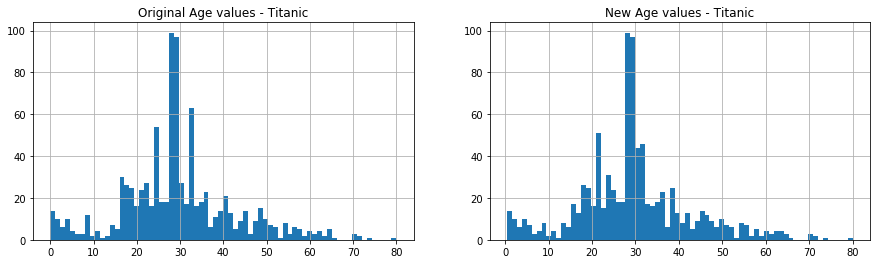

In [33]:
# Age 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

age.dropna().astype(int).hist(bins=70, ax=axis1)
df_train['Age'].hist(bins=70, ax=axis2)

### Drop Missing Value at Cabin Feature

In [34]:
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

In [35]:
print(df_train.isnull().sum())
print('-'*20)
print(df_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
--------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## One-Hot Encode Embark Feature

In [36]:
def one_hot(df):
    embark = pd.get_dummies(df['Embarked'])
    concat = pd.concat([df, embark], axis=1)
    df_new = concat.drop('Embarked', axis=1)
    return df_new

In [37]:
df_train = one_hot(df_train)
df_test = one_hot(df_test)

## Modify Name Feature 

In [38]:
df_train['Title'] = df_train.Name.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df_test['Title'] = df_test.Name.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [39]:
title_train = (df_train['Title'].value_counts() < 10)
title_test = (df_test['Title'].value_counts() < 10)
df_train['Title'] = df_train['Title'].apply(lambda x: 'Misc' if title_train.loc[x] == True else x)
df_test['Title'] = df_test['Title'].apply(lambda x: 'Misc' if title_test .loc[x] == True else x)

In [40]:
def one_hot_title(df):
    title = pd.get_dummies(df['Title'])
    concat = pd.concat([df, title], axis=1)
    df_new = concat.drop(['Title', 'Name'], axis=1)
    return df_new

In [41]:
df_train = one_hot_title(df_train)
df_test = one_hot_title(df_test)

## Modify Ticket Feature 

In [42]:
for i in range(df_train.shape[0]):
    df_train.loc[i, 'Ticket']=int(re.sub('[^0-9\']+', '10', df_train.loc[i, 'Ticket']))

In [43]:
for i in range(df_test.shape[0]):
    df_test.loc[i, 'Ticket']=int(re.sub('[^0-9\']+', '10', df_test.loc[i, 'Ticket']))

## Add More Feature 

In [44]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train['IsAlone'] = 1 #initialize to yes/1 is alone
df_train['IsAlone'].loc[df_train['FamilySize'] > 1] = 0

In [45]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test['IsAlone'] = 1 #initialize to yes/1 is alone
df_test['IsAlone'].loc[df_test['FamilySize'] > 1] = 0

In [46]:
print(df_train.shape)
print(df_test.shape)

(891, 18)
(418, 18)


# Data Visualization

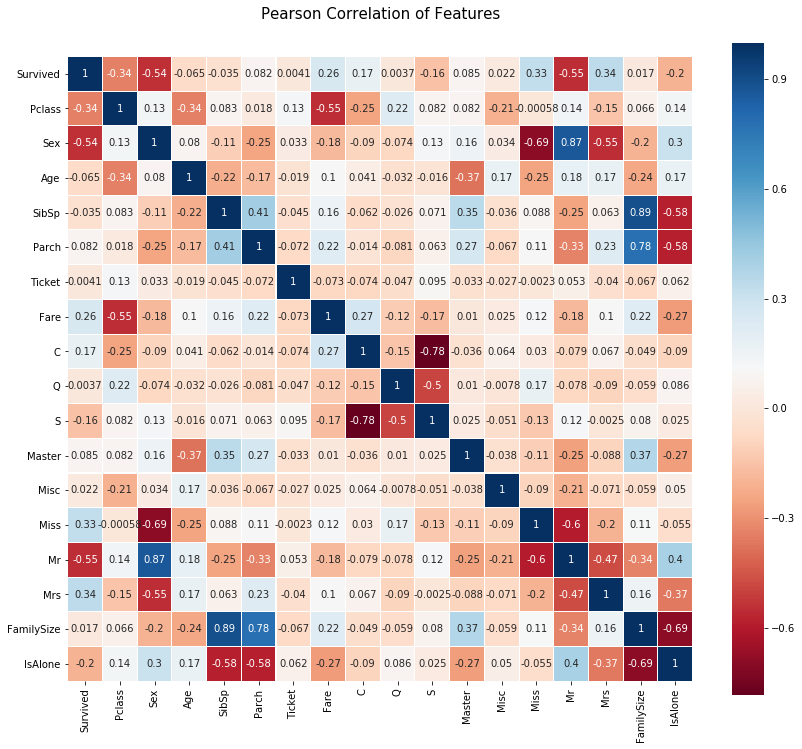

In [47]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Split Label and ID

In [48]:
label = df_train.loc[:, 'Survived']
df_feature = df_train.drop('Survived', axis=1)
print(df_feature.head(1))

   Pclass  Sex   Age  SibSp  Parch      Ticket  Fare  C  Q  S  Master  Misc  \
0       3    1  22.0      1      0  1051021171  7.25  0  0  1       0     0   

   Miss  Mr  Mrs  FamilySize  IsAlone  
0     0   1    0           2        0  


In [49]:
p_id = df_test.loc[:, 'PassengerId']
test = df_test.drop('PassengerId', axis=1)
print(test.head(1))

   Pclass  Sex   Age  SibSp  Parch  Ticket    Fare  C  Q  S  Master  Misc  \
0       3    1  34.5      0      0  330911  7.8292  0  1  0       0     0   

   Miss  Mr  Mrs  FamilySize  IsAlone  
0     0   1    0           1        1  


# UnderSampling

In [50]:
from imblearn.under_sampling import RandomUnderSampler

In [51]:
rus = RandomUnderSampler()

In [52]:
df_under, label_under = rus.fit_sample(df_feature, label)

# Normaliztion

In [53]:
# z-score normalization
def normalize(X_train, X_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    
    normX_train = np.zeros((len(X_train),len(X_train[0])))
    normX_test = np.zeros((len(X_test),len(X_test[0])))
    
    for col in range(len(X_train[0])):
        m = np.mean(X_train[:,col], dtype=np.float64)
        stdv = np.std(X_train[:,col], dtype=np.float64)
        if (stdv > 0.01) :
            normX_train[:, col] = (X_train[:,col]-m)/stdv
            normX_test[:,col] = (X_test[:,col]-m)/stdv
    return normX_train, normX_test

In [54]:
norm_train, norm_test = normalize(df_feature, test)

# Model Selection

In [55]:
# Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from pprint import pprint

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.ensemble import VotingClassifier

In [56]:
# 10 Fold CV
kfold = StratifiedKFold(n_splits=10)

## Build Models

In [57]:
# Modeling step Test differents algorithms
model = []

model.append(xgb.XGBClassifier())
model.append(lgb.LGBMClassifier())
model.append(SVC())
model.append(RandomForestClassifier())
model.append(LogisticRegression())
model.append(KNeighborsClassifier())

## Cross-validation

In [58]:
cv_results = []
for classifier in model :
    result = cross_val_score(classifier, 
                             norm_train, 
                             y = label, 
                             scoring = "accuracy", 
                             cv = kfold, 
                             n_jobs=4)
    cv_results.append(result)

In [59]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    mean = round(cv_result.mean(), 2)
    std = round(cv_result.std(), 2)
    cv_means.append(mean)
    cv_std.append(std)

In [60]:
df_cv = pd.DataFrame({"Mean":cv_means, 
                      "Standard_Deviation": cv_std,
                      "Algorithm":["Xgboost", "Lightboost", "SVC", "RandomForest", "LogisticRegression", "KNN"]})

In [61]:
print(df_cv)

            Algorithm  Mean  Standard_Deviation
0             Xgboost  0.85                0.03
1          Lightboost  0.83                0.06
2                 SVC  0.83                0.03
3        RandomForest  0.82                0.05
4  LogisticRegression  0.83                0.03
5                 KNN  0.82                0.04


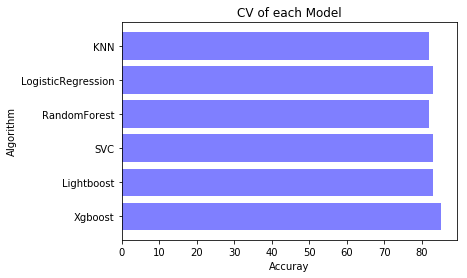

In [62]:
cv_col = list(df_cv.Algorithm)
cv_y = np.arange(len(cv_col))
cv_acc = list(df_cv.Mean*100)

plt.barh(cv_y, cv_acc, align='center', alpha=0.5, color='b')
plt.yticks(cv_y, cv_col)
plt.ylabel('Algorithm')
plt.xlabel('Accuray')
plt.title('CV of each Model')
 
plt.show()

## Tunning Parameter

In [63]:
for classifier in model:
    print('The Model Parameter:')
    pprint(classifier)
    print()

The Model Parameter:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

The Model Parameter:
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

The Model Parameter:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, proba

## Xgboost

In [64]:
xgb_class = xgb.XGBClassifier()

In [65]:
xgb_param_grid = {'max_depth': [3, 9, 12], 
                  'gamma': [0.001, 0.01, 0.1],
                  'learning_rate': [0.001, 0.01, 0.1, 1],
                  'min_child_weight': [1, 3, 5]}

In [66]:
GS_xgb = GridSearchCV(xgb_class,
                      param_grid = xgb_param_grid, 
                      cv=kfold, 
                      scoring="accuracy", 
                      n_jobs= 2, 
                      verbose = 1)

In [67]:
GS_xgb.fit(norm_train, label)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Done 172 tasks      | elapsed:   11.0s
[Parallel(n_jobs=2)]: Done 704 tasks      | elapsed:   52.5s
[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [3, 9, 12], 'gamma': [0.001, 0.01, 0.1], 'learning_rate': [0.001, 0.01, 0.1, 1], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [68]:
xgb_best = GS_xgb.best_estimator_
print('The best parameter for Xgboost:')
pprint(xgb_best)

The best parameter for Xgboost:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [69]:
print('The best score for Xgboost using best parameter:', round(GS_xgb.best_score_, 2))

The best score for Xgboost using best parameter: 0.85


## Lgboost 

In [70]:
lgb_class = lgb.LGBMClassifier()

In [71]:
lgb_param_grid = {'max_depth': [5, 10, 15], 
                  'min_child_samples': [5, 10],
                  'learning_rate': [0.01, 0.1, 1],
                  'min_child_weight': [3, 5],
                  'num_leaves': [20, 40, 60]}

In [72]:
GS_lgb = GridSearchCV(lgb_class,
                      param_grid = lgb_param_grid, 
                      cv=kfold, 
                      scoring="accuracy", 
                      n_jobs= 2, 
                      verbose = 1)

In [73]:
GS_lgb.fit(norm_train, label)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed:  4.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [5, 10, 15], 'min_child_samples': [5, 10], 'learning_rate': [0.01, 0.1, 1], 'min_child_weight': [3, 5], 'num_leaves': [20, 40, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [74]:
lgb_best = GS_lgb.best_estimator_
print('The best parameter for Xgboost:')
pprint(lgb_best)

The best parameter for Xgboost:
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=5, min_child_samples=5,
        min_child_weight=5, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=20, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)


In [75]:
print('The best score for Lgboost using best parameter:', round(GS_lgb.best_score_, 2))

The best score for Lgboost using best parameter: 0.85


## SVM 

In [76]:
svm = SVC(probability=True)

In [77]:
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1],
                  'C': [1, 10, 50, 100, 200, 300]}

In [78]:
GS_svm = GridSearchCV(svm,
                      param_grid = svc_param_grid, 
                      cv=kfold, 
                      scoring="accuracy", 
                      n_jobs= 2, 
                      verbose = 1)

In [79]:
GS_svm.fit(norm_train, label)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:   16.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1], 'C': [1, 10, 50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [80]:
svm_best = GS_svm.best_estimator_
print('The best parameter for SVM:')
pprint(svm_best)

The best parameter for SVM:
SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [81]:
print('The best score for SVM using best parameter:', round(GS_svm.best_score_, 2))

The best score for SVM using best parameter: 0.84


## Random Forest 

In [82]:
rf = RandomForestClassifier()

In [83]:
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

In [84]:
GS_rf = GridSearchCV(rf,
                     param_grid = rf_param_grid, 
                     cv=kfold, 
                     scoring="accuracy", 
                     n_jobs= 2, 
                     verbose = 1)

In [85]:
GS_rf.fit(norm_train, label)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:   14.4s
[Parallel(n_jobs=2)]: Done 386 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 540 out of 540 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [False], 'n_estimators': [100, 300], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [86]:
rf_best = GS_rf.best_estimator_
print('The best parameter for random forest:')
pprint(rf_best)

The best parameter for random forest:
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [87]:
print('The best score for Random Forest using best parameter:', round(GS_rf.best_score_, 2))

The best score for Random Forest using best parameter: 0.85


## Logistic Regression

In [88]:
lg = LogisticRegression()

In [89]:
lg_param_grid = {'C': [1, 10, 50, 100, 200, 300],
                 'max_iter': [100, 1000],
                 'tol': [0.0001, 0.01, 0.1]
                }

In [90]:
GS_lg = GridSearchCV(lg,
                     param_grid = lg_param_grid, 
                     cv=kfold, 
                     scoring="accuracy", 
                     n_jobs= 2, 
                     verbose = 1)

In [91]:
GS_lg.fit(norm_train, label)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:    0.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'C': [1, 10, 50, 100, 200, 300], 'max_iter': [100, 1000], 'tol': [0.0001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [92]:
lg_best = GS_lg.best_estimator_
print('The best parameter for random forest:')
pprint(lg_best)

The best parameter for random forest:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)


In [93]:
print('The best score for Random Forest using best parameter:', round(GS_lg.best_score_, 2))

The best score for Random Forest using best parameter: 0.83


## KNN 

In [94]:
knn = KNeighborsClassifier()

In [95]:
knn_param_grid = {'n_neighbors': [3, 5, 10],
                  'algorithm': ['ball_tree', 'auto', 'kd_tree'],
                  'leaf_size': [10, 30, 50]
                  }

In [96]:
GS_knn = GridSearchCV(knn,
                      param_grid = knn_param_grid, 
                      cv=kfold, 
                      scoring="accuracy", 
                      n_jobs= 2, 
                      verbose = 1)

In [97]:
GS_knn.fit(norm_train, label)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=2)]: Done 270 out of 270 | elapsed:    2.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_neighbors': [3, 5, 10], 'algorithm': ['ball_tree', 'auto', 'kd_tree'], 'leaf_size': [10, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [98]:
knn_best = GS_knn.best_estimator_
print('The best parameter for random forest:')
pprint(knn_best)

The best parameter for random forest:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [99]:
print('The best score for Random Forest using best parameter:', round(GS_knn.best_score_, 2))

The best score for Random Forest using best parameter: 0.82


## Model Compare Accurary 

In [100]:
best_score = []
best_score.append(round(GS_xgb.best_score_, 2))
best_score.append(round(GS_lgb.best_score_, 2))
best_score.append(round(GS_svm.best_score_, 2))
best_score.append(round(GS_rf.best_score_, 2))
best_score.append(round(GS_lg.best_score_, 2))
best_score.append(round(GS_knn.best_score_, 2))

In [101]:
best = pd.Series(best_score, name='Best_Score')

In [102]:
df_score = pd.concat([df_cv, best], axis=1)

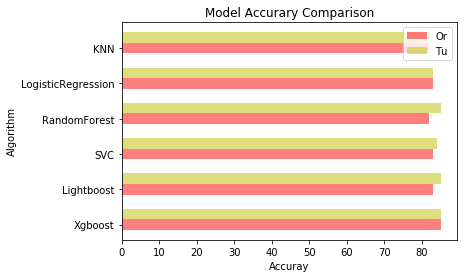

In [103]:
fig, ax = plt.subplots()
width = 0.3
score_col = list(df_score.Algorithm)
score_y = np.arange(len(score_col))
score_mean = list(df_score.Mean*100)
score_best = list(df_score.Best_Score*100)

p1 = ax.barh(score_y, score_mean, width, align='center', alpha=0.5, color='r')
p2 = ax.barh(score_y+width, score_best, width, align='center', alpha=0.5, color='y')
ax.legend((p1[0], p2[0]), ('Or', 'Tu'))
plt.yticks(score_y, score_col)
plt.ylabel('Algorithm')
plt.xlabel('Accuray')
plt.title('Model Accurary Comparison')
 
plt.show()

# Predict Result

In [104]:
test_Survived_xgb = pd.Series(xgb_best.predict(norm_test), name="Xgboost")
test_Survived_lgb = pd.Series(lgb_best.predict(norm_test), name="Lgboost")
test_Survived_rf = pd.Series(rf_best.predict(norm_test), name="Random_Forest")
test_Survived_svm = pd.Series(svm_best.predict(norm_test), name="SVM")
test_Survived_lg = pd.Series(lg_best.predict(norm_test), name="Logistic_Regression")

In [105]:
ensemble_results = pd.concat([test_Survived_xgb,
                              test_Survived_lgb,
                              test_Survived_rf,
                              test_Survived_svm, 
                              test_Survived_lg], axis=1)

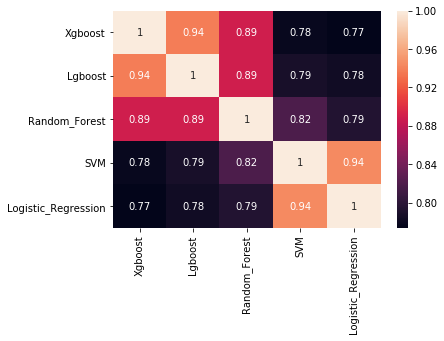

In [106]:
sns.heatmap(ensemble_results.corr(),annot=True)

## Ensemble Model 

In [107]:
votingC = VotingClassifier(estimators=[('XGB', xgb_best), 
                                       ('LGB', lgb_best),
                                       ('rf', rf_best), 
                                       ('svm', svm_best),
                                       ('lg', lg_best)], 
                                       voting='soft', n_jobs=2)

In [108]:
votingC = votingC.fit(norm_train, label)

In [109]:
test_Survived = pd.Series(votingC.predict(norm_test), name="Survived")

In [110]:
results = pd.concat([p_id, test_Survived], axis=1)

In [111]:
results.to_csv("result.csv", index=False)